# Pokemon Data Aggregation with Groupby

<center><img src="../images/stock/pexels-caleboquendo-7772561.jpg"></center>

In this lesson, we'll explore data aggregation using the `groupby()` method. 

## Getting Started

### Import Libraries

First, we'll bring in the essential tools we'll need for this lesson:

```python
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
````



In [14]:
## Import Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Load Dataset

Next, we'll load the `Pokémon` dataset.

This `Pokémon` dataset contains various details on Pokémon.

__Columns:__

* __`#`__: The unique identifier or Pokédex number.

* __`Name`__: The name of the Pokémon (including Mega Evolutions).

* __`Type 1`__: The primary elemental type (Grass, Fire, Water, etc.).

* __`Type 2`__: The secondary elemental type. This is missing for single-type Pokémon.

* __`Total`__: The sum of all six base stats.

* __`HP`, `Attack`, `Defense`, `Sp. Atk`, `Sp. Def`, `Speed`__: The individual base stats that determine battle performance.

* __`Generation`__: The generation number in which the Pokémon was introduced.

* __`Legendary`__: A boolean (`True`/`False`) indicating if the Pokémon is a Legendary/Mythical creature.


In [18]:
## Load and Preview Dataset
file = "../data/pokemon.csv"

pokemon_df = pd.read_csv(file)

### Inspect the Dataset

Before we start grouping and aggregating, it's always a good idea to get a feel for our data. Let's use the `.info()` method on our DataFrame to get a summary of its structure.

In [19]:
## View Key Information on the Dataset
pokemon_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


### Data Cleaning

As noted from the .info() output, it seems our dataset contains some missing values. 

To get a closer look at the specific rows that contain these missing values, we can create a boolean mask. This mask will identify rows where at least one column has a null value. Then, we can use this mask to select and display those rows.

In [20]:
## View Rows Containing Null Values
pokemon_df["Type 2"] = pokemon_df["Type 2"].fillna("None")

pokemon_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      800 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


### Visualizations

Before we dive into the power of `groupby()`, let's create some basic visualizations to get a general sense of the relationships between different variables in our cleaned dataset. 

This will help us identify potential areas where grouping and aggregation might reveal interesting insights.

#### Bar Plot - Country of Origin

Let's visualize the distribution of cars in our cleaned dataset based on their country of origin using a bar plot. 

This will give us a sense of how many cars in our sample come from the USA, Europe, and Asia.

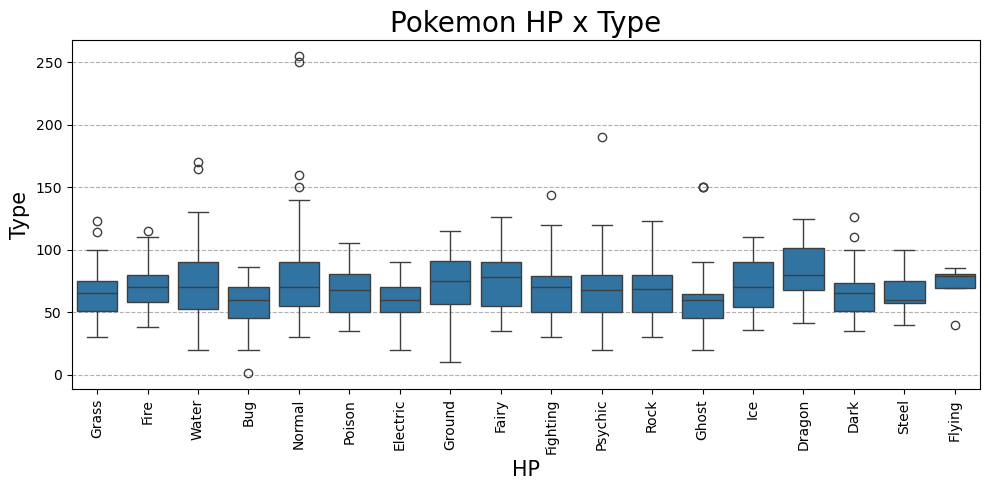

In [27]:
### 
# Data


# Draw Figure
plt.figure(figsize=(10,5), dpi=100)

# Draw Plot
sns.boxplot(
    data=pokemon_df,
    x="Type 1",
    y="HP")

# Customize
plt.title("Pokemon HP x Type", fontsize = 20)
plt.xlabel("HP", fontsize = 15)
plt.ylabel("Type", fontsize = 15)
plt.xticks(rotation=90)
plt.grid(axis="y", linestyle="--")
plt.tight_layout()

## Visualizing All Numerical Distributions (Subplots)

To quickly get familiar with our numerical data, let's visualize the distribution across the entire dataset.

We can quickly generate a grid of histograms for every numerical column in our DataFrame using the built-in Pandas `.hist()` function. This creates a multi-panel chart known as a subplot.

Because subplots can often overlap, we use `plt.subplots_adjust()` to manually set the horizontal (`wspace`) and vertical (`hspace`) padding, ensuring all titles and labels are legible.

__Syntax__:
```python
# Create the figure object (optional, but good for control)
plt.figure(figsize=(WIDTH, HEIGHT))

# Generate the Subplots
DataFrame.hist(
    figsize=(WIDTH, HEIGHT),
    bins=NUMBER_OF_BINS,
    edgecolor="COLOR"
)

# Adjust Spacing
plt.subplots_adjust(
    hspace=VERTICAL_SPACE_RATIO,
    wspace=HORIZONTAL_SPACE_RATIO
)

# Customize Plot
plt.suptitle("Title")

# Show the Plot
plt.show() # Used when running in a script/environment that needs explicit display
```

Text(0.5, 0.98, 'Distribution of Numerical Data')

<Figure size 1000x700 with 0 Axes>

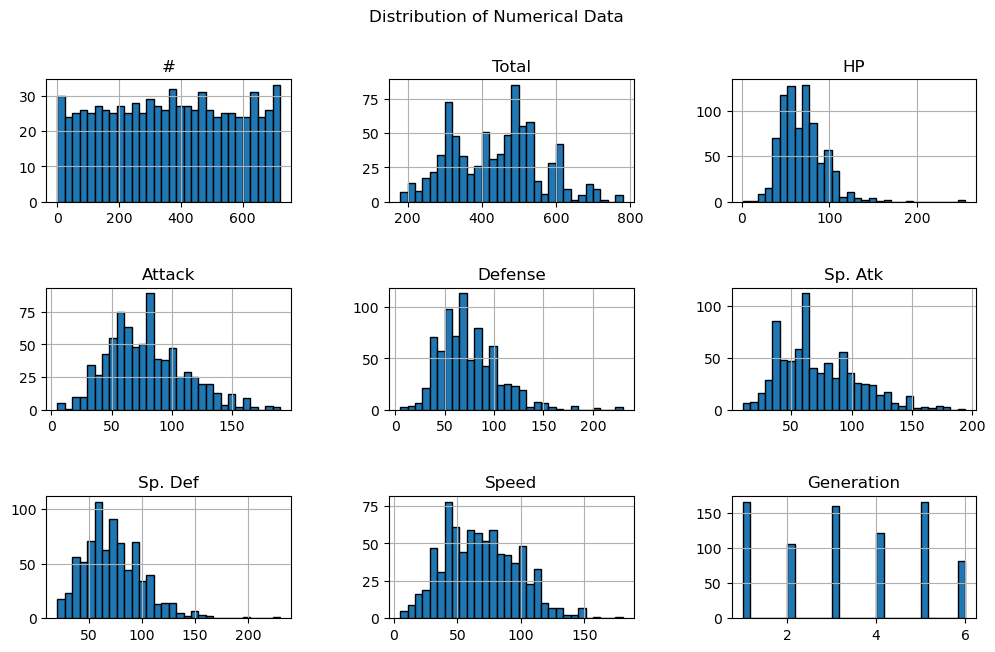

In [58]:
# Draw Figure
plt.figure(figsize=(10,7))

# Generate Plot
pokemon_df.hist(figsize=(12,7),
       bins=30,
      edgecolor="black")

plt.subplots_adjust(hspace=0.7,
                    wspace=0.4)

# Customize Plot
plt.suptitle("Distribution of Numerical Data")

## Split-Apply-Combine: The Concept Behind Groupby

<center><img src="../images/stock/pexels-mark-enkey-2156438346-34524495.jpg"></center>

The `groupby()` method is based on the split-apply-combine strategy:

* __Split:__ The data is divided into groups based on one or more columns.

* __Apply:__ You apply a function (e.g., mean, sum, count) to each group independently.

* __Combine:__ The results from each group are combined into a new data structure.

## Understanding Groupby

Let's break down the `groupby()` method step by step.

* What is a Groupby Object?

    * When you apply the `groupby()` method to a DataFrame, it doesn't immediately perform calculations. 
    * Instead, it creates a DataFrameGroupBy object. 
    * This object contains information about how the data has been split into groups, but the calculations are deferred until you specify an aggregation function.

__Syntax__

The basic syntax for `groupby()` is:

```python
df.groupby(column_name)
```

* `df`: The Pandas DataFrame you want to group.

* `column_name`: The column name (or a list of column names) that you want to group the data by.

### Example: Grouping by Origin

Now, let's get to the heart of this lesson: using the `groupby()` method. 

We'll start with a simple example by grouping our DataFrame based on the `Type 1` column. 

This will categorize our data into several groups: .

In [56]:
## Begin Example
group_pokemon = pokemon_df.groupby("Type 1")

The output of `.groupby()` will be a `DataFrameGroupBy` object. 

This object signifies that the data has been successfully organized into groups based on the unique values in the `origin` column (USA, Europe, Asia). 

However, it's important to remember that this is an intermediate step. No actual calculations or aggregations have been applied to these groups yet. 

To gain meaningful insights, we need to tell Pandas what kind of operation we want to perform on each of these origin-based groups, such as calculating the mean, sum, or count of specific columns. 

The DataFrameGroupBy object provides the structure for these subsequent aggregation operations.

## Applying Aggregation Functions

<center><img src="../images/stock/pexels-anton-8100-243698.jpg"></center>

With our data now organized into groups based on the `Type 1` of the Pokemon, the next step is to apply aggregation functions. 

These functions allow us to calculate summary statistics for each group, providing us with insights into the characteristics of Pokemon based on their type. 

Let's explore some common aggregation functions in Pandas.

### Mean

Which Pokemon Type, on average, has the greatest Attack Power? 

We can calculate the average `Attack` for each Pokemon Type by using the `.mean()` aggregation function.

__Syntax__

```python
DataFrame.groupby('Categorical_Column')['Numerical_Column'].Aggregation_Function()
```

Let's apply this to our group object.

In [39]:
## Begin Calculation
pokemon_type_attack_mean = group_pokemon["Attack"].mean()
pokemon_type_attack_mean

Type 1
Bug          70.971014
Dark         88.387097
Dragon      112.125000
Electric     69.090909
Fairy        61.529412
Fighting     96.777778
Fire         84.769231
Flying       78.750000
Ghost        73.781250
Grass        73.214286
Ground       95.750000
Ice          72.750000
Normal       73.469388
Poison       74.678571
Psychic      71.456140
Rock         92.863636
Steel        92.703704
Water        74.151786
Name: Attack, dtype: float64

### Visualize

Once we perform an aggregation with `groupby()`, the resulting data structure is a Pandas Series, where the grouping column is used as the index.

Before generating a visualization with plotting libraries like `Seaborn`, we typically need the index (the groups) to be treated as a regular data column in a DataFrame. This is done by resetting the index.

Syntax:

```python
Aggregated_Series.reset_index(name='New_Column_Name')
```

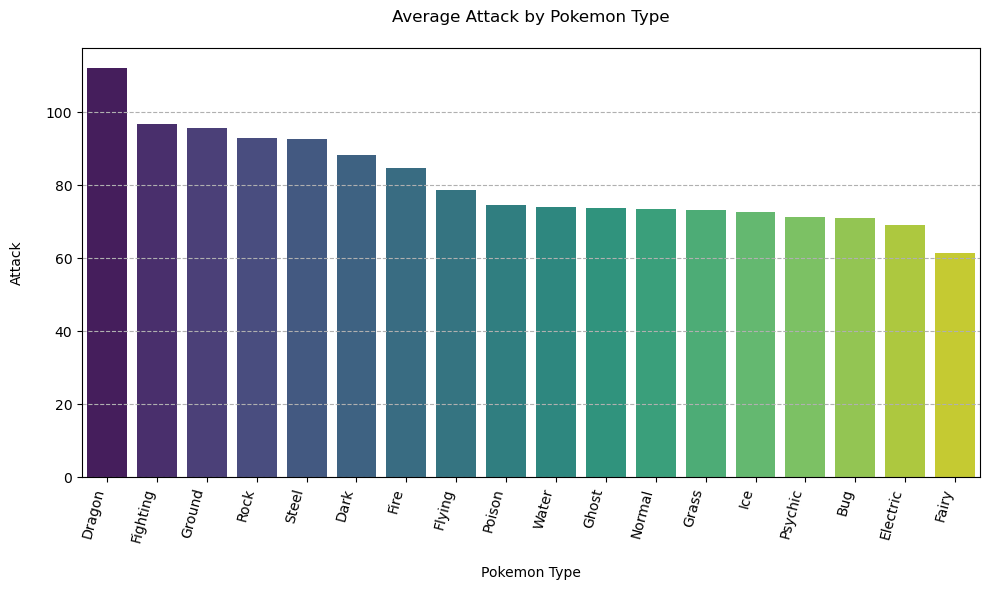

In [55]:
# Visualize Average Attack x Pokemon Type

# Convert Groupby Series into a DataFrame by Reseting the Index
pokemon_type_attack_mean = pokemon_type_attack_mean.reset_index("Type 1")

# Sort by Attack
pokemon_type_attack_mean = pokemon_type_attack_mean.sort_values(by="Attack", ascending=False)

# Draw Figure
plt.figure(figsize=(10,6))

# Draw Plot
sns.barplot(
    data=pokemon_type_attack_mean,
    x="Type 1",
    y="Attack",
    hue="Type 1",
palette="viridis")
    
# Customize
plt.title("Average Attack by Pokemon Type\n")
plt.xlabel("\nPokemon Type")
plt.xticks(rotation=75, ha="right")
plt.ylabel("Attack\n")
plt.grid(axis="y", linestyle="--")
plt.tight_layout()

# Show 
plt.show()

Let's apply `mean()` to determine the average vehicle horse power by Country of Origin.

In [ ]:
## Perform Calculation





Now let's follow up with a visualization.

In [ ]:
# Visualize Average Horsepower by Origin

# Data


# Draw Figure
plt.figure(figsize=(10,6))

# Draw Plot




# Customize
plt.title("Average Horsepower by Country of Origin\n")
plt.xlabel("\nCountry of Origin")
plt.ylabel("Average Horsepower\n")
plt.grid(axis="y", linestyle="--")
plt.tight_layout()

# Show 
plt.show()

### Sum

To determine which country of origin produced the highest total horsepower across all its car models in the dataset, we can use the `.sum()` aggregation function after grouping by `origin`.

In [ ]:
## Begin Calculation



In [ ]:
## Begin Visualization
# Data


# Draw Figure
plt.figure(figsize=(10,6))


# Draw Plot




# Customize
plt.title("Total Vehicle Horsepower by Country of Origin\n")
plt.xlabel("\nCountry of Origin")
plt.ylabel("Total Horsepower\n")
plt.grid(axis="y", linestyle="--")
plt.tight_layout()

# Show 
plt.show()

### Groupby Revisited

When we use `.groupby()`, imagine sorting your entire dataset into separate bins, where each bin holds rows that share the same value in a specific column. In our case with the `mpg` dataset, we used `.groupby('origin')` to create distinct groups: one containing all American cars, another for European cars, and a third for Japanese cars.

<center> Original Data Set</center>

| mpg | cylinders | origin |
|-----|-----------|--------|
| 18  |     8     |  USA   |
| 15  |     8     |  USA   |
| 24  |     4     | Europe |
| 31  |     4     | Japan  |
| 22  |     8     |  USA   |
| 35  |     4     | Japan  |
| 28  |     4     | Europe |
| ... |     ...   |  ...   |


<center>USA Group</center>

| mpg | cylinders | origin |
|-----|-----------|--------|
| 18  |     8     |  USA   |
| 15  |     8     |  USA   |
| 22  |     8     |  USA   |
| ... |     ...   |  USA   |

<center>Europe Group</center>

| mpg | cylinders | origin |
|-----|-----------|--------|
| 24  |     4     | Europe |
| 22  |     6     | Europe |
| 28  |     4     | Europe |
| ... |     ...   | Europe |

<center>Japan Group</center>

| mpg | cylinders | origin |
|-----|-----------|--------|
| 31  |     4     | Japan  |
| 35  |     4     | Japan  |
| 32  |     4     | Japan  |
| ... |     ...   | Japan  |

         
Once these groups are formed, we can then apply aggregate functions like .mean() to each individual bin. So, when we calculated `.mean()` on the `'mpg'` column after grouping by 'origin', we effectively found the average miles per gallon within each of those origin-specific groups.

<center>The resulting Series of Average MPG</center>

| Origin |  |
|--------|-------------------|
| europe | 27.602941         |
| japan  | 30.450633         |
| usa    | 20.033469         |


This powerful tool allows us to analyze trends and differences across various categories within our data, providing valuable insights that might be hidden in the overall dataset.

### Other Useful Aggregation Functions

Here are some other commonly used aggregation functions:

* __`count()`__: Number of non-null values in each group.

* __`min()`__: Minimum value in each group.

* __`max()`__: Maximum value in each group.

* __`any()`__: Returns True if any value in the group is True.

* __`all()`__: Returns True if all values in the group are True.

* __`median()`__: Median value of each group.

* __`std()`__: Standard deviation of each group.

## Groupby Multiple Columns

<center><img src="../images/stock/pexels-introspectivedsgn-9661252.jpg"></center>

The power of `.groupby()` extends beyond just a single column. 

You can also group your data based on the unique combinations of values from multiple columns. This allows for even more granular analysis and the creation of more specific subgroups within your data. 

When you group by multiple columns, the resulting structure will have a hierarchical index (also known as a MultiIndex), reflecting the different levels of grouping you've applied.

Let's build upon our previous example and perform a more detailed analysis. We'll group our DataFrame by both `make` and `model_year`, and then calculate the average MPG for each unique combination of these two factors. 

This will allow us to see how the fuel efficiency of specific car manufacturers has changed over the years.

In [ ]:
# Group by Make and Model Year



In [ ]:
# Get Average MPG



### MultiIndex
When you group a DataFrame by multiple columns, the resulting Series or DataFrame often has a MultiIndex. This means that the index itself has multiple levels, corresponding to the columns you used in the `.groupby()` operation.

In the case of grouping by `make` and `model_year`, the resulting Series from calculating the mean MPG would have a MultiIndex where the first level is `make` and the second level is `model_year`.

To access a specific value in a Series or DataFrame with a MultiIndex, you can use `.loc[]` with a tuple containing the values for each level of the index. 

The order in the tuple corresponds to the order of the columns you used in the `groupby()` function.

In [ ]:
## Accessing MultiIndex Elements




### Resetting the Index

As we've seen, grouping by multiple columns creates a hierarchical index (MultiIndex) in the resulting Pandas Series or DataFrame. While MultiIndexes are powerful for advanced data manipulation, sometimes it's more convenient to have the grouping columns (`make` and `model_year` in our previous example) as regular, flat columns in the DataFrame.

To achieve this, we can use the `.reset_index()` method on the Series or DataFrame that results from the `.groupby()` operation. This will convert the levels of the MultiIndex into new columns with their respective names, and a new default integer index will be assigned to the DataFrame.

Let's apply `.reset_index()` to our MultiIndex Series:

In [ ]:
## Reset the Index




The `.reset_index()` operation transforms the MultiIndex Series into a Pandas DataFrame. 

The `make` and `model_year` that were previously part of the hierarchical index are now converted into regular columns within this DataFrame. 

A new, simple numerical index is automatically assigned to the rows, and the average MPG values are stored in a column named `mpg`. This DataFrame format is often more convenient for subsequent analysis and visualization, especially when tools expect the grouping variables as distinct columns.

## Applying Multiple Aggregation Functions with `.agg()`

<center><img src="../images/stock/pexels-caleboquendo-7708407.jpg"></center>

While functions like `.mean()` and `.sum()` allow us to calculate a single statistic for each group, Pandas provides the versatile `.agg()` method to apply multiple aggregation functions simultaneously. This can be incredibly useful for getting a more comprehensive summary of your grouped data in one go.

The `.agg()` method accepts a variety of arguments:

* A single aggregation function (as we've seen with `.mean()` and `.sum()`): This works just like calling the function directly on the grouped selection.
A list of aggregation functions: You can pass a list of function names (as strings) or the function objects themselves (e.g., `['mean', 'sum', 'count']` or `[pd.Series.mean, np.sum, 'size']`).

* A dictionary where keys are column names and values are the aggregation function(s) to apply to that column: This allows you to apply different aggregations to different columns within the same `groupby()` operation. The values in the dictionary can be a single function or a list of functions.

### Applying Multiple Aggregations to One Column

To get a richer understanding of a single variable across our groups, we can use the `.agg()` method to calculate several summary statistics simultaneously. 

In the following code, we'll group our data by `origin` and then apply multiple aggregation functions to the `mpg` column, giving us a comprehensive overview of the fuel efficiency for cars from each country.

Using `groupby()` and `.agg()`, let's determine and visualize the mean, minimum, and maximum `mpg` values by Country of Origin.

In [ ]:
## Begin Example



In [ ]:
## Begin Visualization
# Data


# Draw Figure
plt.figure(figsize=(10,6))


# Draw Plot



# Customize
plt.title(" ")
plt.xlabel(" ")
plt.ylabel(" ")
plt.grid(axis="y", linestyle="--")
plt.tight_layout()

# Show 
plt.show()

`origin_grouped['mpg'].agg(['mean','min', 'max'])` selects the `mpg` column for each origin group and then calculates the mean, minimum, and maximum values within that group.

The result is a DataFrame where the index is `origin` and the columns are the aggregation function results.

### Applying Different Aggregations to Different Columns

We aren't limited to applying the same aggregation to all columns. 

Instead, we can specify different summary statistics for different columns within our grouped object. This allows us to tailor our analysis to the specific characteristics of each variable. 

In the following example, we'll group by `origin` and then calculate different statistics for `mpg`, `horsepower`, `weight`, and `model` to get a more nuanced understanding of the cars from each region.

* For the `mpg` column, calculate both the mean and max.
* For the `horsepower` column, calculate the mean.
* For the `weight` column, we find the median.
* For the `model` column, we use `count` to determine the number of unique car models within each origin group, giving us an idea of the sample size for each region.

In [ ]:
## Begin Example




In [ ]:
## Begin Visualization
# Data


# Draw Figure
plt.figure(figsize=(10,6))


# Draw Plot



# Customize
plt.title(" ")
plt.xlabel(" ")
plt.ylabel(" ")
plt.grid(axis="y", linestyle="--")
plt.tight_layout()

# Show 
plt.show()

`origin_grouped.agg({...})` allows us to specify which aggregation functions to apply to which columns.

The result is a dataframe with origin as the index and a hierarchical column structure where the first level is the column name (`mpg`, `horsepower`, `weight`, `model`) and the second level is the aggregation function applied.

## Conclusion

<center><img src="../images/stock/pexels-abhishek-rana-422784-4188296.jpg"></center>

Now you've seen the power and flexibility of the `.groupby()` method in Pandas for segmenting your data and calculating insightful summary statistics for each group. We explored how to apply individual aggregation functions like `.mean()` and `.sum()`, and then expanded our toolkit with the versatile `.agg() method`, allowing us to calculate multiple statistics simultaneously across different columns. 

Furthermore, we learned how `.reset_index()` can transform the grouped output into a more conventional DataFrame structure, making it easier to work with for subsequent analysis and visualization, especially when tools expect grouping variables as regular columns.

As you continue your data exploration journey, remember that libraries like Seaborn can significantly enhance your visualizations of grouped data. Seaborn often works seamlessly with DataFrames created after a `groupby()` and `reset_index()` operation, providing more sophisticated plot types and aesthetics with less code. We strongly encourage you to investigate Seaborn's capabilities for creating compelling and informative visual representations of your aggregated datasets, unlocking deeper understanding and more impactful communication of your findings.